<a href="https://colab.research.google.com/github/quentinnorris/miniproject-2/blob/master/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MiniProject 2

General Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn import tree
from sklearn import svm

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import re
nltk.download('stopwords')

from wordcloud import WordCloud, STOPWORDS



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Part 2

You must run experiments using at least two different classifiers from the SciKit learn package (which are not Bernoulli Naive Bayes)

Possible options are:
 
*Logistic regression*
(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

*Decision trees*
(https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

*Support vector machines* [to be introduced in Lecture 10 on Oct. 7th]
(https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

### Importing Data

In [0]:


#reading in data and then dropping unnamed axis for training set 

train = 'https://raw.githubusercontent.com/stedmana/miniproject-2/master/reddit_train.csv'
df_train = pd.read_csv(train).drop(columns='id')

#reading in data and then dropping unamed axis for test set

test = 'https://raw.githubusercontent.com/stedmana/miniproject-2/master/reddit_test.csv'
df_test = pd.read_csv(test).drop(columns='id')

In [6]:


# checking if data was imported correctly 

df_train.head()

,comments,subreddits
0,"Honestly, Buffalo is the correct answer. I rem...",hockey
1,Ah yes way could have been :( remember when he...,nba
2,https://youtu.be/6xxbBR8iSZ0?t=40m49s\n\nIf yo...,leagueoflegends
3,He wouldn't have been a bad signing if we woul...,soccer
4,Easy. You use the piss and dry technique. Let ...,funny


### Cleaning Data/Basic Feature Engineering


In [8]:
# check shape
df_train.shape

(69159, 2)

In [0]:
# remove duplicate posts
df_train.drop_duplicates(keep='first', inplace=True)

In [9]:
# check shape
df_train.shape

(69159, 2)

Wordmap to utilize and play around with to augment feature engineering choices 

(-0.5, 739.5, 539.5, -0.5)

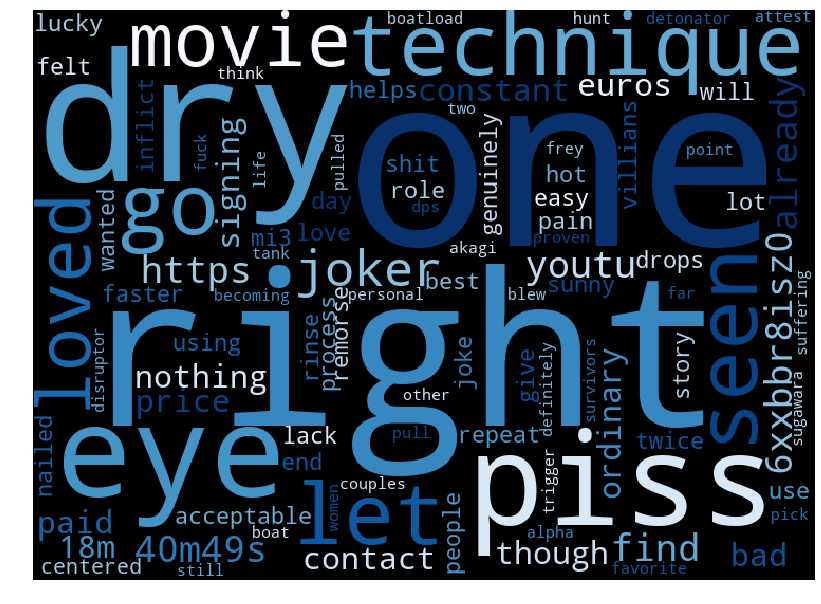

In [38]:
text = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the words in the comments
for x in df_train.comments[2:10]: 
      
    # typecaste each val to string 
    x = str(x) 
  
    # split the value 
    values = x.split() 
      
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
          
    for words in values: 
        text = text + words + ' '
  
  
wc = WordCloud(max_words= 100,
                      width = 740, 
                      height = 540,
                      background_color ='black',
                      stopwords=stopwords, 
                      contour_width=3, 
                      min_font_size = 10, colormap="Blues").generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(wc) 
plt.axis("off")

## Logistic Regression

In [0]:
#creation of feature list vs targets 

X = df_train.comments
y = df_train.subreddits


In [0]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8, test_size=0.2)

### **Implementation Comparison with Data**

#### Vectorize Text

In [12]:
#count vectorization 2 
vectorizer = CountVectorizer()
print(vectorizer)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [0]:
# vectorize from tutorial 
vectors_train = vectorizer.fit_transform(X_train)
vectors_test = vectorizer.transform(X_test)

In [12]:
clf = LogisticRegression()

print(clf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [13]:
clf.fit(vectors_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = clf.predict(vectors_test) 

In [15]:
metrics.accuracy_score(y_test, y_pred)

0.5181463273568536

#### TF-IDF

In [0]:
# term weighting for textual features 

tf_idf_vectorizer = TfidfVectorizer()
vectors_train_idf = tf_idf_vectorizer.fit_transform(X_train)
vectors_test_idf = tf_idf_vectorizer.transform(X_test)

In [20]:
clf.fit(vectors_train_idf, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_idf = clf.predict(vectors_test_idf) 

In [22]:
metrics.accuracy_score(y_test, y_pred_idf)

0.5318102949681897

#### Normalization

In [0]:
#normalize vectors from IDF (had a higher score then the vectorization of text dataset)

vectors_train_normalized = normalize(vectors_train_idf)
vectors_test_normalized = normalize(vectors_test_idf)

In [25]:
clf.fit(vectors_train_normalized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_normalized = clf.predict(vectors_test_normalized)

In [32]:
metrics.accuracy_score(y_test, y_pred_normalized)

0.5318102949681897

### [TODO] LR HyperParamter Tuning

## Decision Tree

In [0]:
clfD = tree.DecisionTreeClassifier()
clfD = clfD.fit(vectors_train, y_train)

In [0]:
y_pred_normalizedD = clfD.predict(vectors_test)

In [41]:
metrics.accuracy_score(y_test, y_pred_normalizedD)

0.267567958357432

## Linear Support Vector Classification

In [0]:
clfSVM = svm.SVC(gamma='auto', kernel = 'linear')
clfSVM.fit(vectors_train_normalized, y_train)

In [0]:
y_pred_SVM = clfSVM.predict(vectors_test_normalized)

In [0]:
metrics.accuracy_score(y_test, y_pred_SVM)